In [63]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [64]:
#Loading Data 
df= pd.read_csv("collegePlace.csv")

In [65]:
#Preprocessing 
df.head()

Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male         Information Technology            0     8       0   
4   22    Male                     Mechanical            0     8       1   

   HistoryOfBacklogs  PlacedOrNot  
0                  1            1  
1                  1            1  
2                  0            1  
3                  1            1  
4                  0            1

In [66]:
df.shape

(2966, 8)

In [67]:
df.describe()

Age  Internships         CGPA       Hostel  HistoryOfBacklogs  \
count  2966.000000  2966.000000  2966.000000  2966.000000        2966.000000   
mean     21.485840     0.703641     7.073837     0.269049           0.192178   
std       1.324933     0.740197     0.967748     0.443540           0.394079   
min      19.000000     0.000000     5.000000     0.000000           0.000000   
25%      21.000000     0.000000     6.000000     0.000000           0.000000   
50%      21.000000     1.000000     7.000000     0.000000           0.000000   
75%      22.000000     1.000000     8.000000     1.000000           0.000000   
max      30.000000     3.000000     9.000000     1.000000           1.000000   

       PlacedOrNot  
count  2966.000000  
mean      0.552596  
std       0.497310  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [68]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df)

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22       1  Electronics And Communication            1     8       1   
1      21       0               Computer Science            0     7       1   
2      22       0         Information Technology            1     6       0   
3      21       1         Information Technology            0     8       0   
4      22       1                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23       1         Information Technology            0     7       0   
2962   23       1                     Mechanical            1     7       1   
2963   22       1         Information Technology            1     7       0   
2964   22       1               Computer Science            1     7       0   
2965   23       1                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0           

In [69]:
Stream_mapping = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Mechanical': 2,
    'Civil': 3,
    'Information Technology': 4,
    'Electrical': 5
}

df['Stream'] = df['Stream'].map(Stream_mapping)
print(df)

      Age  Gender  Stream  Internships  CGPA  Hostel  HistoryOfBacklogs  \
0      22       1       0            1     8       1                  1   
1      21       0       1            0     7       1                  1   
2      22       0       4            1     6       0                  0   
3      21       1       4            0     8       0                  1   
4      22       1       2            0     8       1                  0   
...   ...     ...     ...          ...   ...     ...                ...   
2961   23       1       4            0     7       0                  0   
2962   23       1       2            1     7       1                  0   
2963   22       1       4            1     7       0                  0   
2964   22       1       1            1     7       0                  0   
2965   23       1       3            0     8       0                  0   

      PlacedOrNot  
0               1  
1               1  
2               1  
3               1  

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [71]:
df.count()

Age                  2966
Gender               2966
Stream               2966
Internships          2966
CGPA                 2966
Hostel               2966
HistoryOfBacklogs    2966
PlacedOrNot          2966
dtype: int64

In [72]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [73]:
df.dtypes

Age                  int64
Gender               int64
Stream               int64
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64
dtype: object

In [74]:
df.isnull()

Age  Gender  Stream  Internships   CGPA  Hostel  HistoryOfBacklogs  \
0     False   False   False        False  False   False              False   
1     False   False   False        False  False   False              False   
2     False   False   False        False  False   False              False   
3     False   False   False        False  False   False              False   
4     False   False   False        False  False   False              False   
...     ...     ...     ...          ...    ...     ...                ...   
2961  False   False   False        False  False   False              False   
2962  False   False   False        False  False   False              False   
2963  False   False   False        False  False   False              False   
2964  False   False   False        False  False   False              False   
2965  False   False   False        False  False   False              False   

      PlacedOrNot  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
2961        False  
2962        False  
2963        False  
2964        False  
2965        False  

[2966 rows x 8 columns]

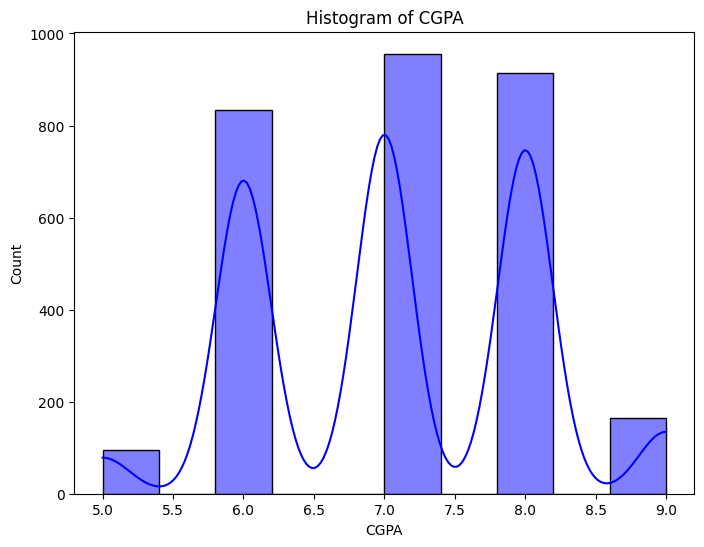

In [75]:
#Data Visualisation 
plt.figure(figsize=(8, 6))
sns.histplot(df['CGPA'], bins=10, kde=True, color='blue')
plt.xlabel('CGPA')
plt.title('Histogram of CGPA')
plt.show()

C:\Users\Aadil Rayeen\AppData\Local\Temp\ipykernel_18796\1596842438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stream', data=df, palette='muted')


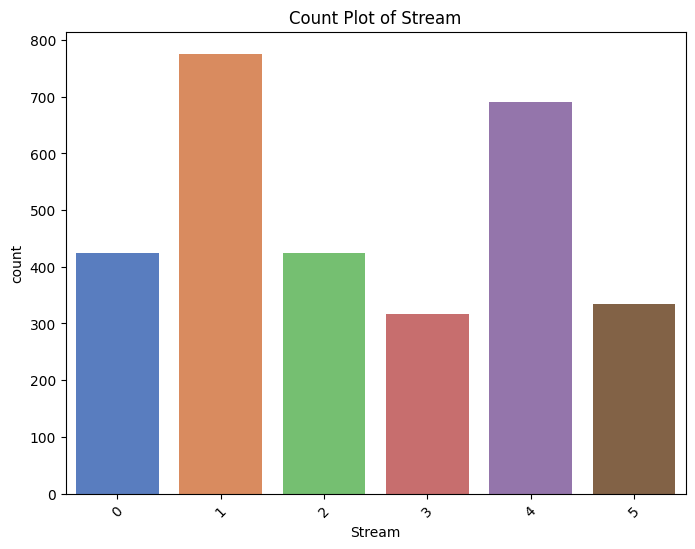

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stream', data=df, palette='muted')
plt.title('Count Plot of Stream')
plt.xticks(rotation=45)
plt.show()

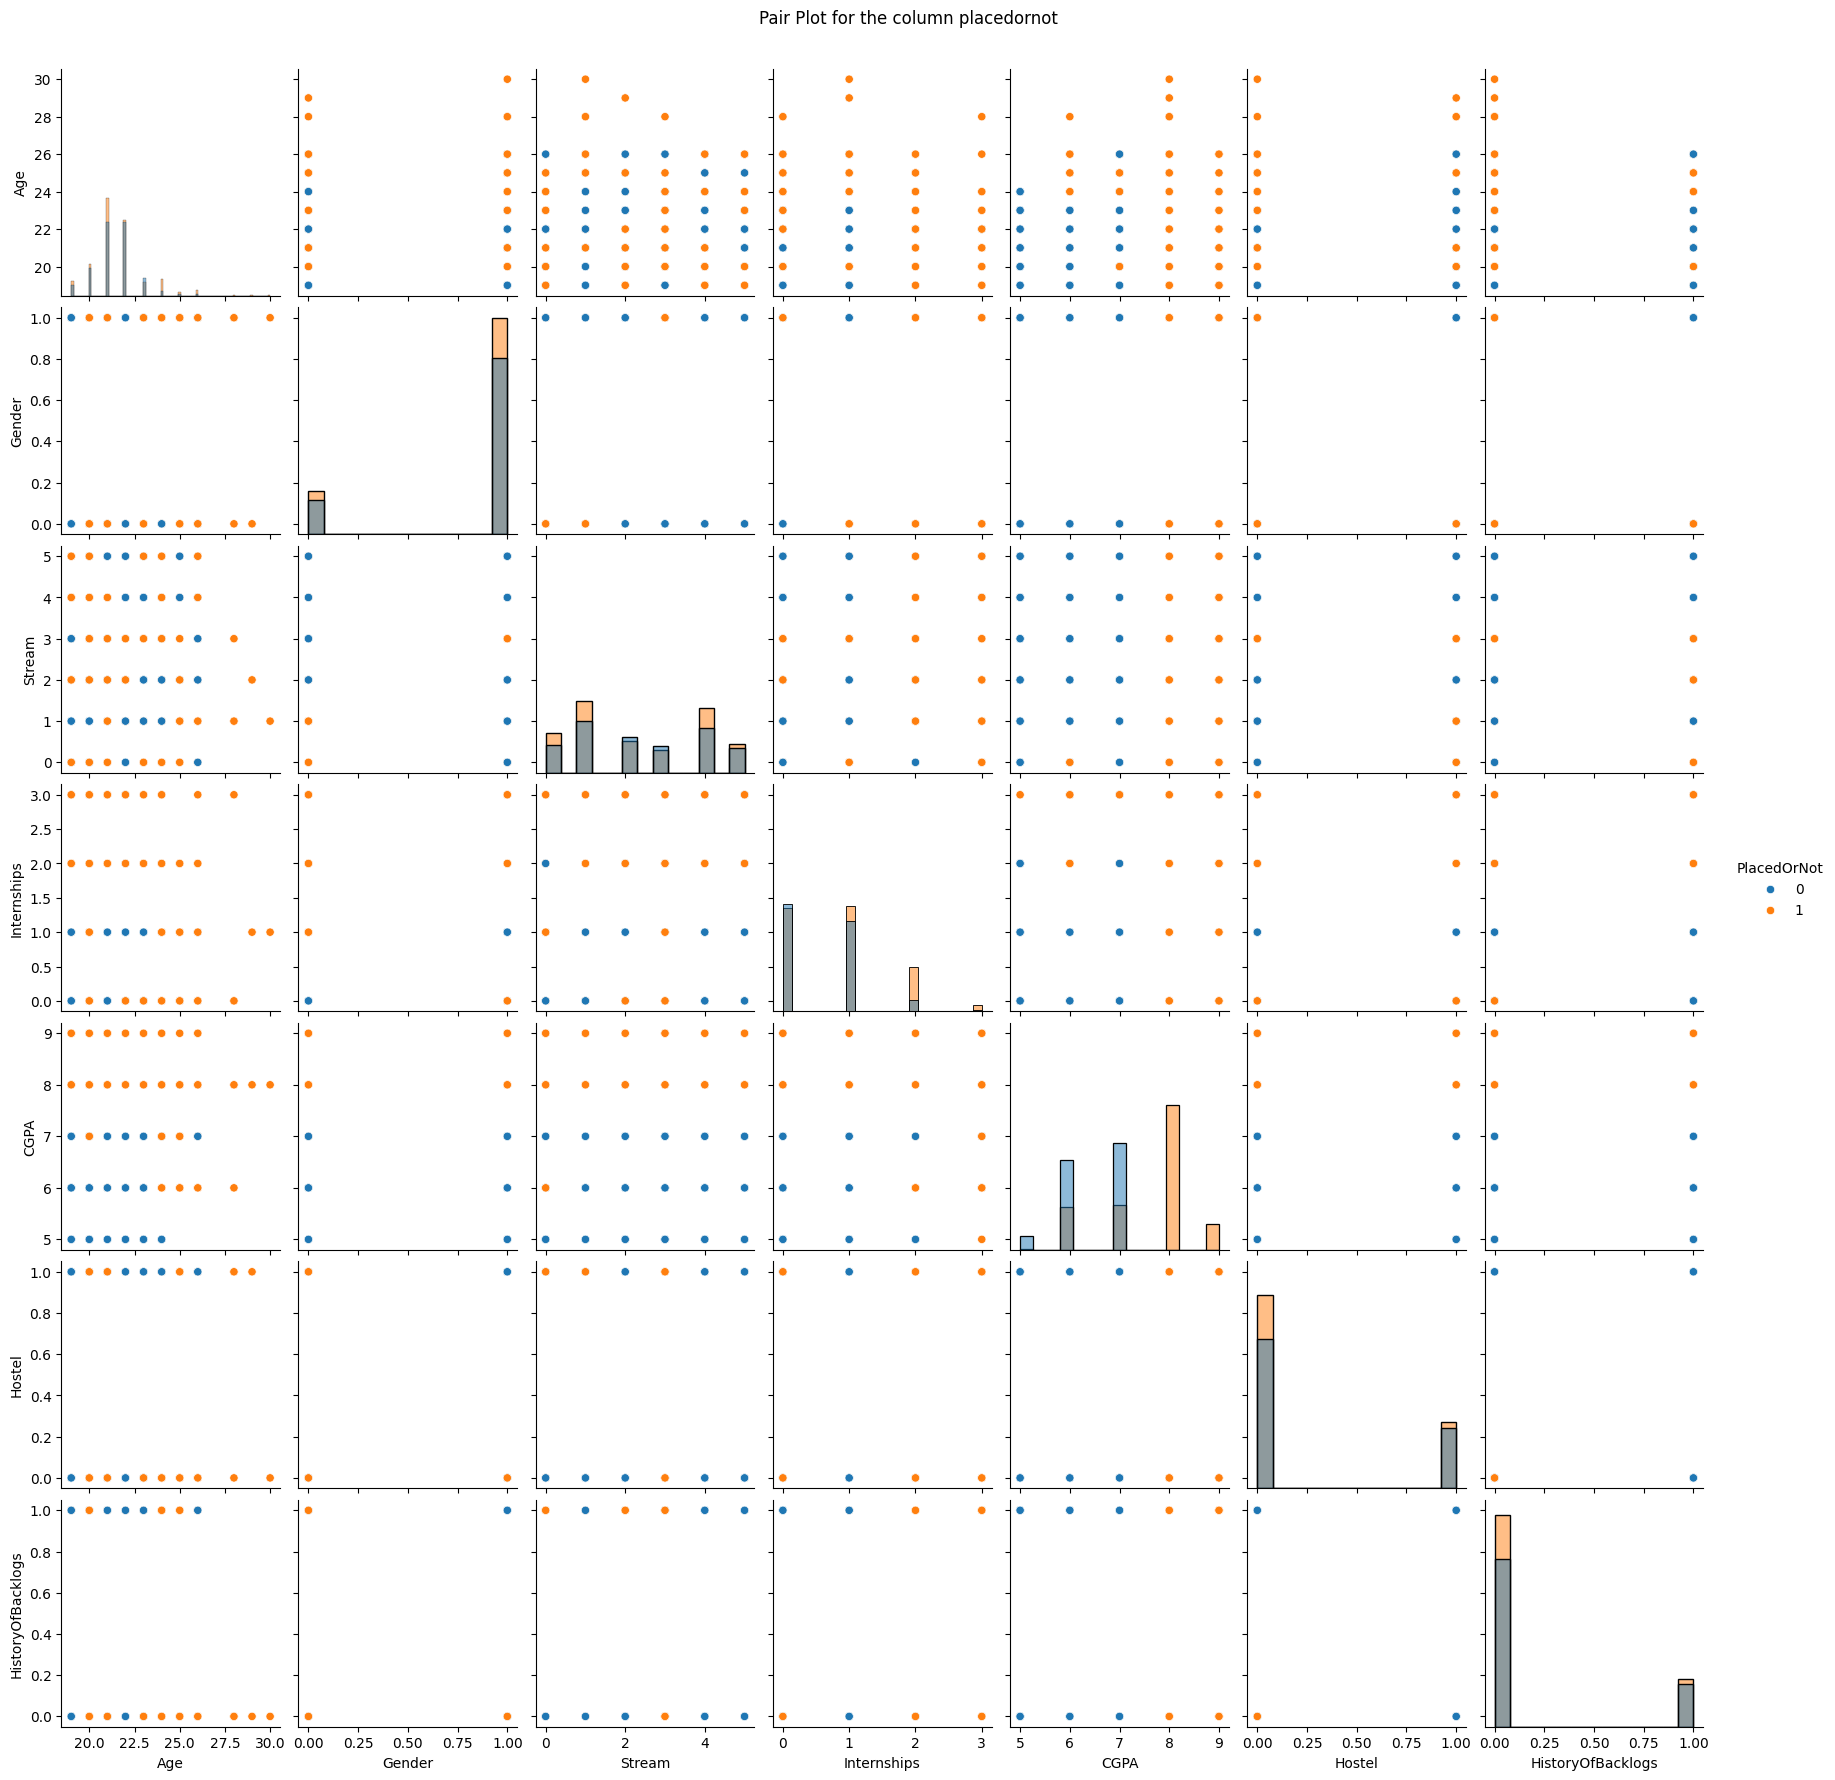

In [77]:
sns.pairplot(df, hue='PlacedOrNot', diag_kind='hist')
plt.suptitle('Pair Plot for the column placedornot', y=1.02)
plt.show()

In [78]:
#Model
X = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

In [80]:
y_pred = perceptron.predict(X_test)

In [81]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

      Actual  Predicted
2395       0          0
794        1          1
1894       1          1
332        0          0
2023       0          1
...      ...        ...
1938       1          1
2607       1          1
1395       0          0
602        1          1
2308       1          0

[594 rows x 2 columns]


In [82]:
coefficients = perceptron.coef_
intercept = perceptron.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-56. -61. -24. 113. 237. -69. -11.]]
Intercept: [-556.]


In [83]:
# Print coefficients with feature names
coefficients_with_names = list(zip(X.columns, coefficients[0]))
for feature, coefficient in coefficients_with_names:
    print(f"{feature}: {coefficient}")

Age: -56.0
Gender: -61.0
Stream: -24.0
Internships: 113.0
CGPA: 237.0
Hostel: -69.0
HistoryOfBacklogs: -11.0


In [84]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Model Evaluation:
Accuracy: 0.7323232323232324
Precision: 0.9144385026737968
Recall: 0.5445859872611465
F1-score: 0.6826347305389222


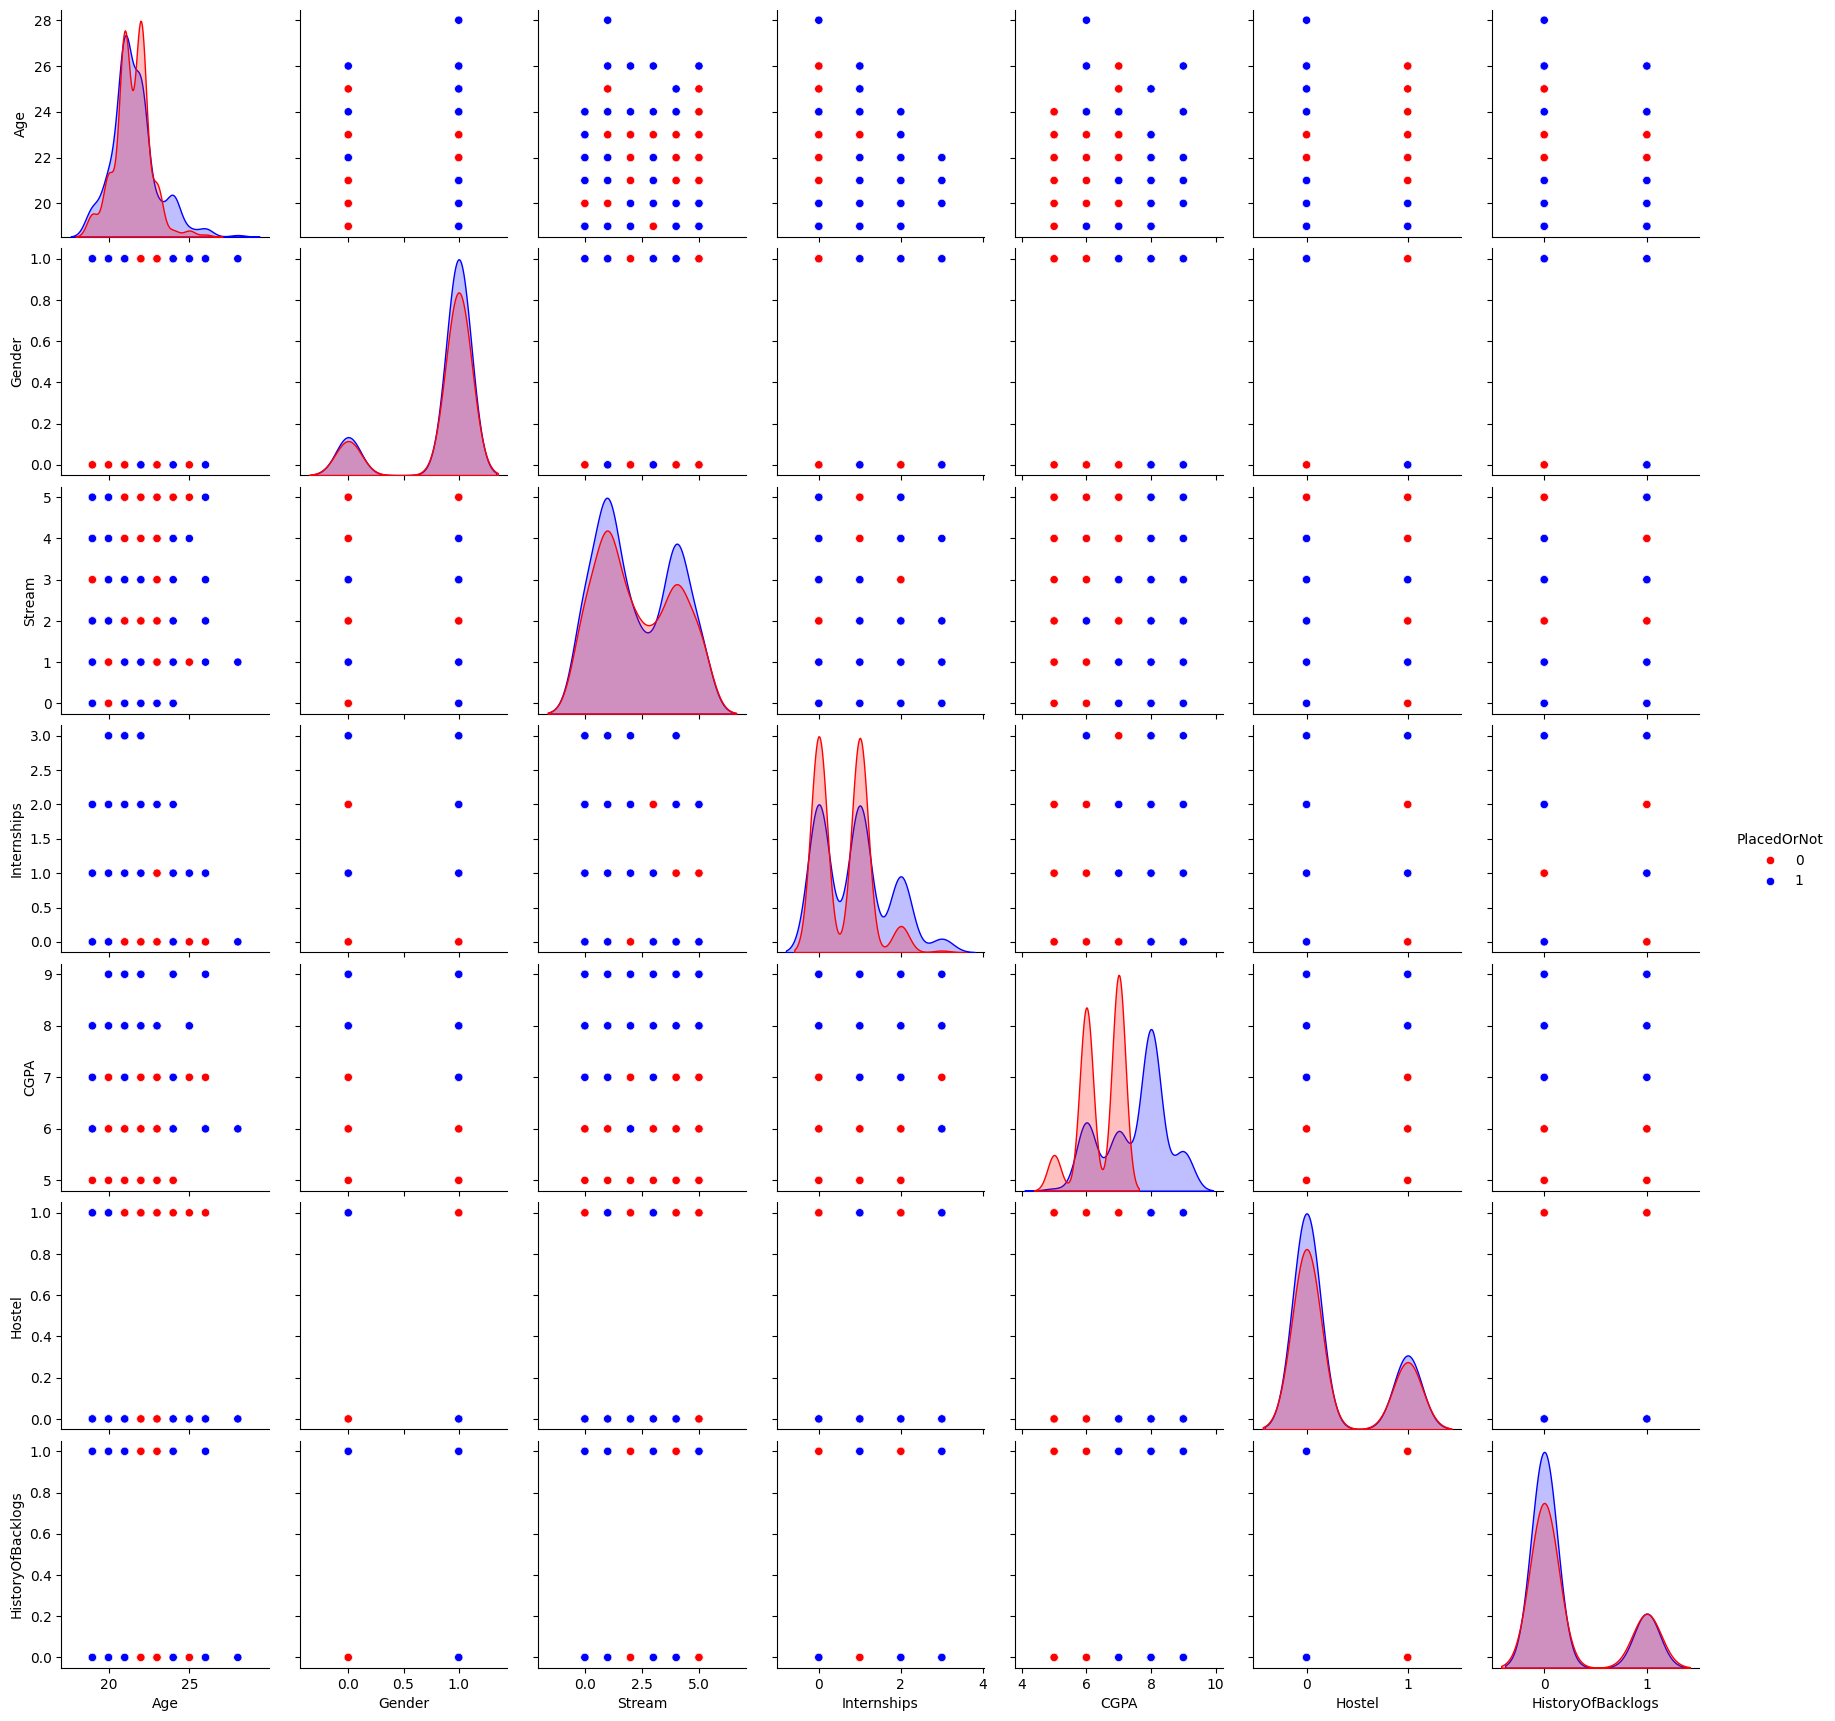

In [85]:
X_test['PlacedOrNot'] = y_test

# Create a pair plot
sns.pairplot(X_test, hue='PlacedOrNot', palette={0: 'red', 1: 'blue'})
plt.show()

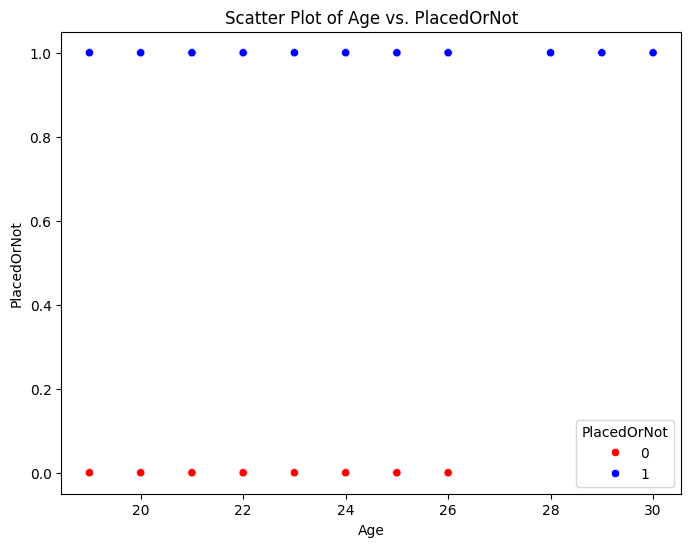

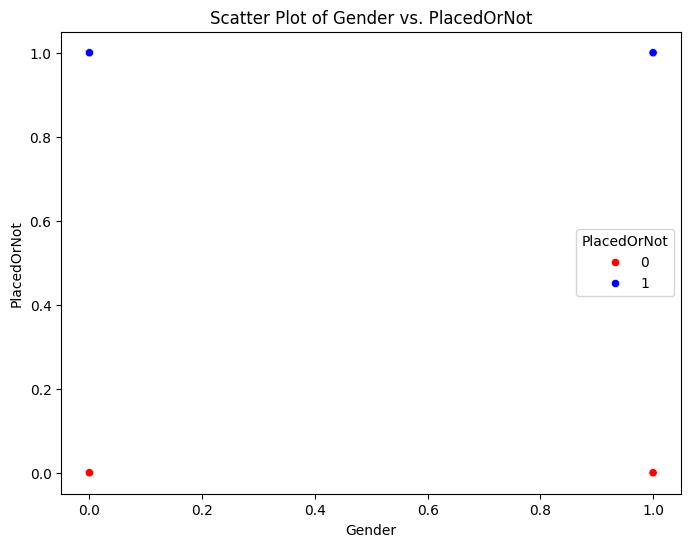

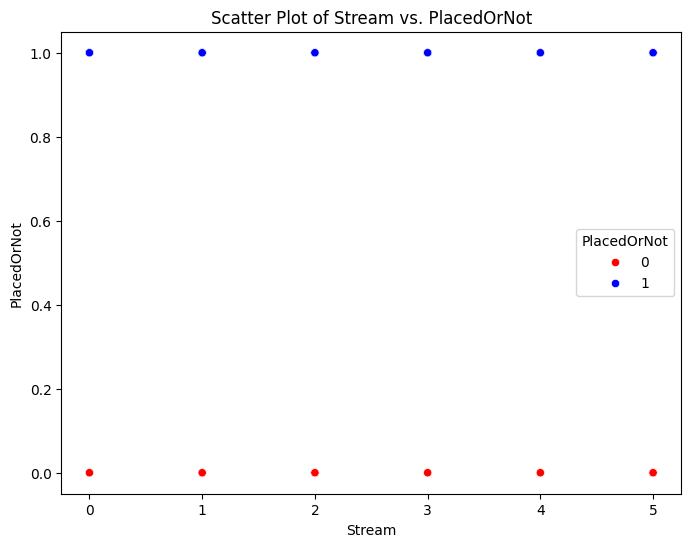

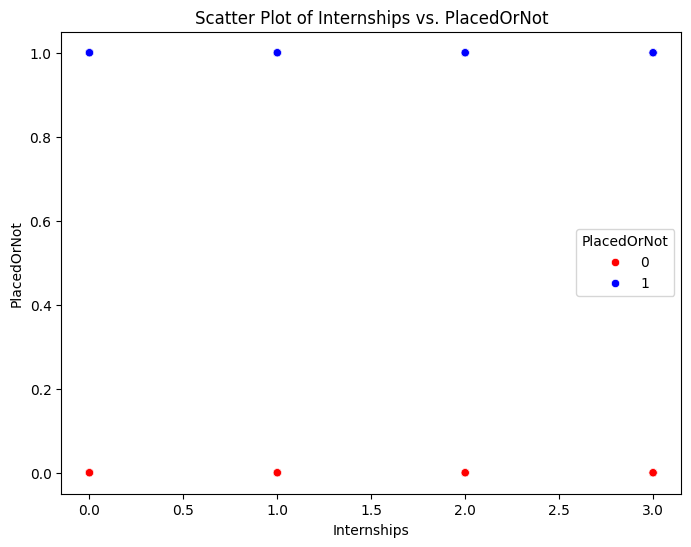

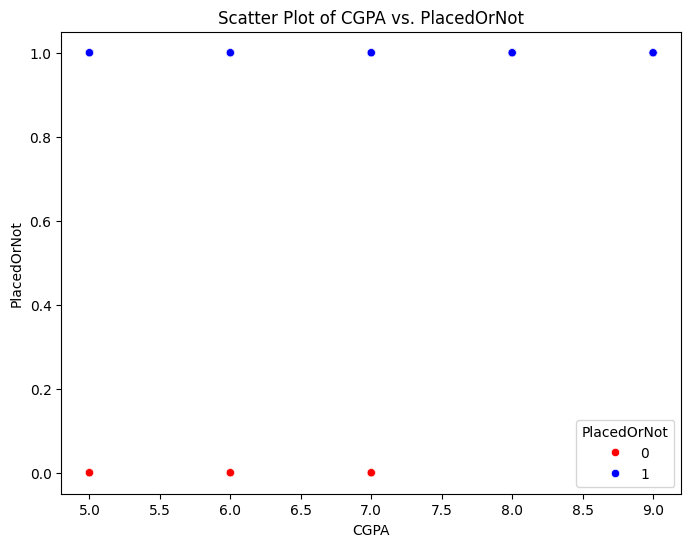

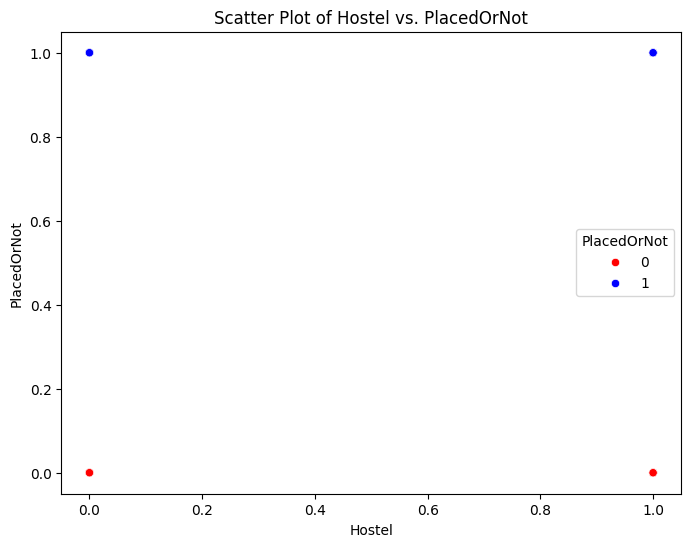

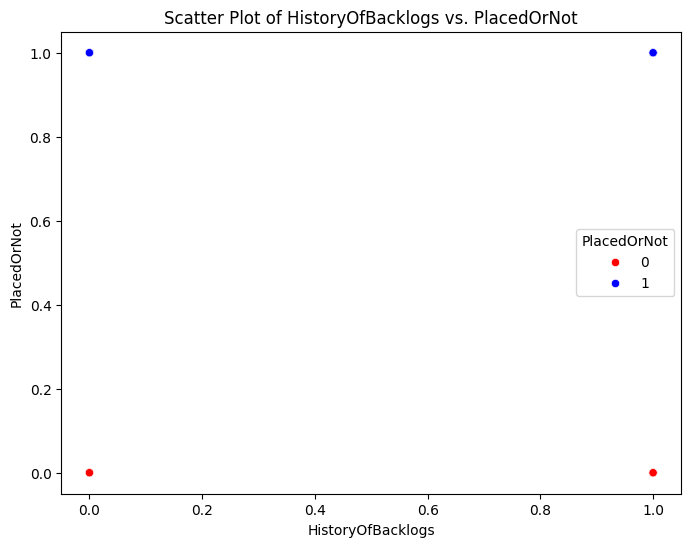

In [86]:
features = X.columns
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='PlacedOrNot', data=pd.concat([X_train, y_train], axis=1), hue='PlacedOrNot', palette={0: 'red', 1: 'blue'})
    plt.title(f'Scatter Plot of {feature} vs. PlacedOrNot')
    plt.xlabel(feature)
    plt.ylabel('PlacedOrNot')
    plt.show()

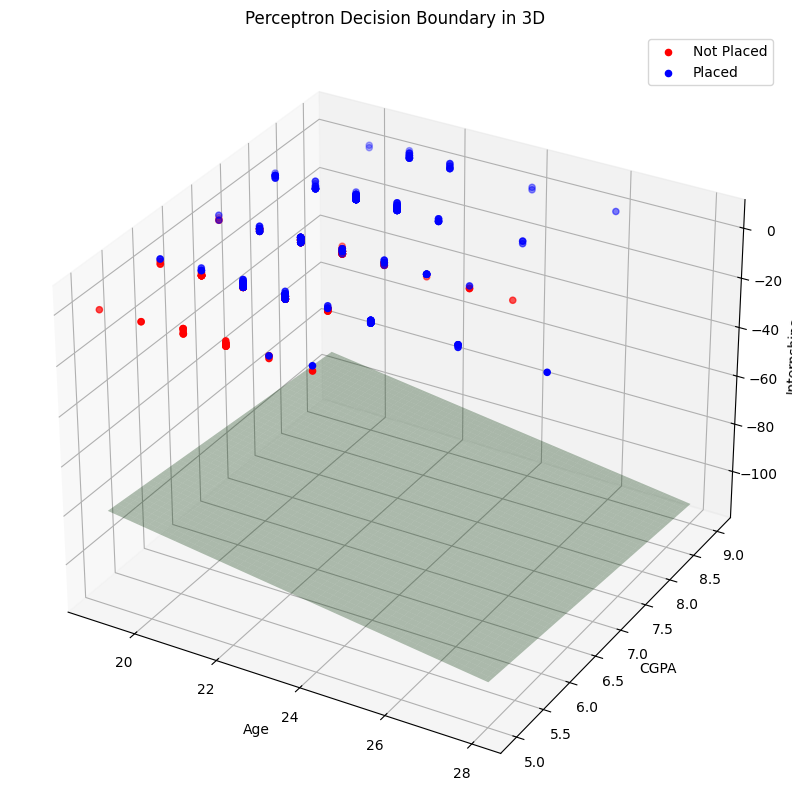

In [87]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Not Placed'
ax.scatter(X_test.loc[y_test == 0, 'Age'], X_test.loc[y_test == 0, 'CGPA'], X_test.loc[y_test == 0, 'Internships'], c='red', label='Not Placed')

# Scatter plot for 'Placed'
ax.scatter(X_test.loc[y_test == 1, 'Age'], X_test.loc[y_test == 1, 'CGPA'], X_test.loc[y_test == 1, 'Internships'], c='blue', label='Placed')

xx, yy = np.meshgrid(np.linspace(X_test['Age'].min(), X_test['Age'].max(), 100),
                     np.linspace(X_test['CGPA'].min(), X_test['CGPA'].max(), 100))
zz = (-perceptron.coef_[0][0] * xx - perceptron.coef_[0][1] * yy - perceptron.intercept_) / perceptron.coef_[0][2]

# Plotting the decision boundary
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Adding labels and legend
ax.set_xlabel('Age')
ax.set_ylabel('CGPA')
ax.set_zlabel('Internships')
ax.set_title('Perceptron Decision Boundary in 3D')
ax.legend()
plt.show()

In [88]:
# Giving prediction for new
new_data = {
    'Age': 23,
    'Gender': 1,
    'Stream': 0,  
    'Internships': 3,
    'CGPA': 8.0,
    'Hostel': 1,  
    'HistoryOfBacklogs': 1
}

# Reshape the input data into a 2D array for prediction
new_data_array = np.array([[new_data[feature] for feature in X.columns]])

# Make the prediction
prediction = perceptron.predict(new_data_array)

# Print the prediction
if prediction == 1:
    print("The model predicts: Placed")
else:
    print("The model predicts: Not Placed")


The model predicts: Placed


C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [89]:
new_data = {
    'Age': 23,
    'Gender': 0,  
    'Stream': 0,  
    'Internships': 1,
    'CGPA': 4.0,
    'Hostel': 2,  
    'HistoryOfBacklogs': 3
}

# Reshape the input data into a 2D array for prediction
new_data_array = np.array([[new_data[feature] for feature in X.columns]])

# Make the prediction
prediction = perceptron.predict(new_data_array)

# Print the prediction
if prediction == 1:
    print("The model predicts: Placed")
else:
    print("The model predicts: Not Placed")


The model predicts: Not Placed


C:\Users\Aadil Rayeen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
